In [ ]:
#Random Forest is an ensemble learning technique. It builds a number of decision trees on the randomly selected data sample. 
#Then it gets predictions from each tree and by means of majority voting, it selects the decision which gets the majority vote.

In [ ]:
# How does the Algorithm work?
#As said earlier, this algorithm is based on decision trees. For a given dataset, it takes some random data points,
#builds decision trees one at a time around them. The number of trees is defined in the program. Then it comprises the
#Trees. 

In [ ]:
# The steps for Random Forest Algorithms are as follows-\

# 1.   Pick at random K data points from the Training set. 
# 2.   Build the Decision Tree associated with these K data points. 
# 3.   Choose the number Ntree of trees you want to build and repeat STEPS 1 & 2 
# 4.   For a new data point, make each one of your Ntree trees predict the category to which the data points belongs,
       #and assign the new data point to the category that wins the majority vote.

### Random Forest on Digit_Data

In [13]:
import pandas as pd
from sklearn.datasets import load_digits
digits  = load_digits()

In [14]:
dir(digits)             #  # it givrs columns name on digit data

['DESCR', 'data', 'images', 'target', 'target_names']

In [15]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

<Figure size 432x288 with 0 Axes>

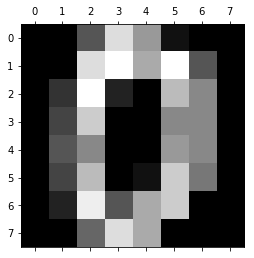

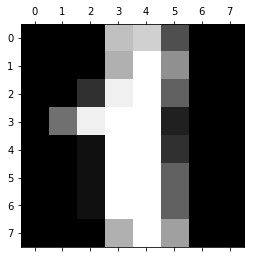

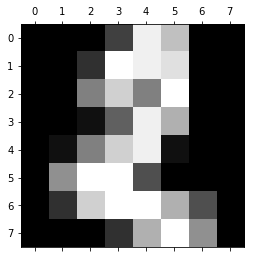

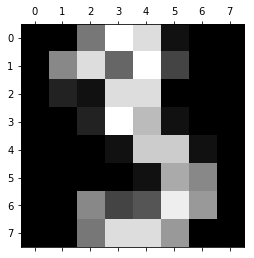

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])
    

In [19]:
# create dataframe
df = pd.DataFrame(digits.data)


In [21]:
digits.data[:5]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [22]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [23]:
len(digits.target)

1797

In [25]:
# now we will add target to our digit dataframe
df['target'] = digits.target                  # create new column target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [26]:
x = df.iloc[:,:64]
x.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [28]:
y = df.iloc[:,64]
y.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

C:\Users\avinash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
model.score(x_train,y_train)*100

100.0

In [36]:
y_pred = model.predict(x_test)
y_pred

array([7, 4, 2, 6, 3, 1, 0, 1, 3, 8, 8, 7, 0, 0, 4, 4, 6, 2, 3, 8, 5, 3,
       2, 2, 0, 5, 1, 5, 2, 3, 2, 9, 3, 1, 7, 3, 9, 6, 7, 8, 7, 3, 9, 3,
       2, 7, 4, 3, 1, 0, 6, 7, 1, 2, 9, 0, 7, 4, 9, 7, 8, 6, 1, 9, 5, 1,
       3, 3, 0, 7, 5, 6, 4, 6, 9, 5, 1, 3, 0, 0, 6, 8, 9, 4, 2, 2, 0, 4,
       9, 6, 0, 7, 2, 2, 1, 2, 9, 2, 0, 6, 3, 5, 2, 0, 4, 1, 1, 8, 5, 5,
       7, 3, 9, 3, 8, 5, 0, 0, 2, 0, 8, 7, 5, 9, 5, 0, 8, 8, 2, 7, 9, 6,
       4, 4, 4, 0, 4, 1, 1, 8, 1, 2, 0, 1, 9, 2, 2, 2, 3, 5, 2, 8, 5, 3,
       9, 3, 2, 4, 5, 6, 3, 1, 2, 9, 3, 6, 5, 1, 7, 1, 2, 6, 0, 0, 1, 1,
       7, 3, 8, 3, 8, 5, 0, 3, 4, 6, 4, 7, 7, 8, 8, 7, 9, 5, 4, 1, 7, 7,
       4, 4, 7, 4, 1, 6, 7, 1, 7, 2, 5, 8, 4, 4, 7, 8, 2, 1, 2, 1, 3, 4,
       2, 1, 1, 9, 0, 1, 9, 4, 6, 5, 7, 3, 9, 7, 2, 6, 0, 2, 6, 1, 5, 4,
       0, 3, 3, 4, 0, 8, 8, 6, 6, 0, 4, 3, 1, 5, 0, 4, 9, 3, 9, 4, 8, 9,
       5, 1, 7, 9, 3, 9, 3, 7, 7, 3, 7, 7, 1, 4, 0, 7, 4, 8, 7, 1, 1, 7,
       8, 6, 1, 1, 4, 0, 6, 6, 5, 4, 5, 9, 5, 0, 2,

In [37]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[60,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 52,  1,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 66,  0,  2,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 57,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  1, 63,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  1,  0, 49,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 66,  0,  1],
       [ 0,  2,  2,  1,  0,  2,  0,  0, 53,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  3, 50]], dtype=int64)

In [39]:
cm.sum()

594

Text(69.0, 0.5, 'Truth')

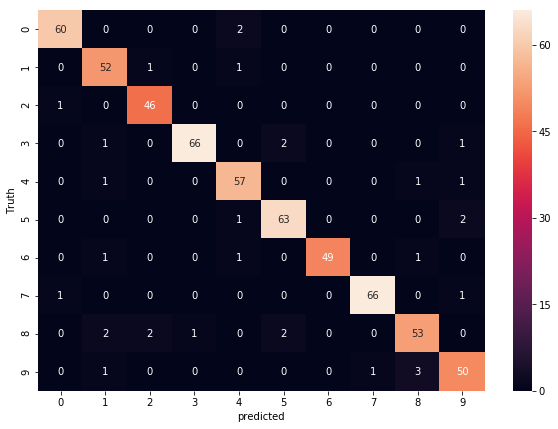

In [46]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')#


In [47]:
df['target'].value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [49]:
df['target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [50]:
df['target'].nunique()

10